In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as  np

In [19]:
df = pd.read_csv('placement.csv')

In [20]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in LPA')

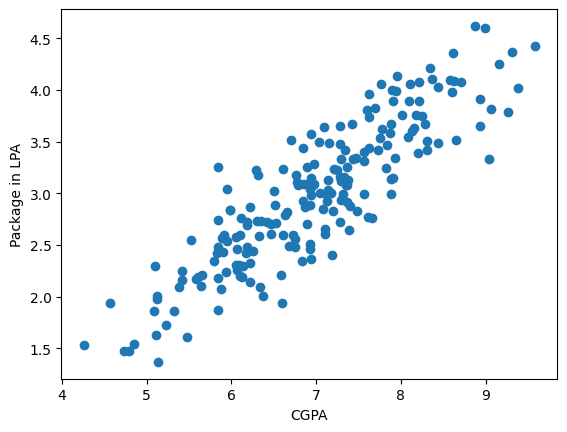

In [21]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [22]:
x = df.iloc[:,0:1]
y=df.iloc[:,-1]

In [23]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
lr = LinearRegression()


In [27]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Package in (LPA)')

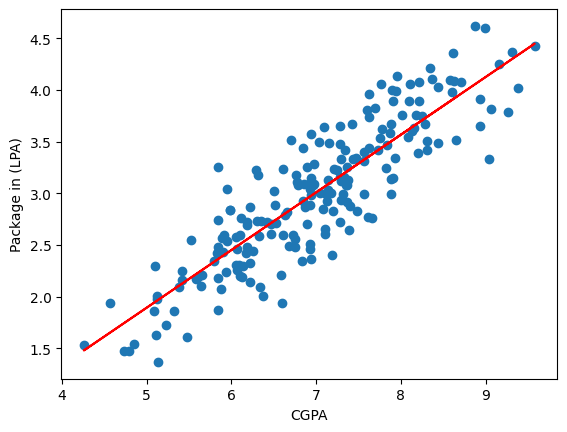

In [28]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package in (LPA)')

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
y_pred = lr.predict(x_test)

In [35]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [36]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [39]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [40]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [42]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [43]:
# Adjusted r2 score
x_test.shape

(40, 1)

In [45]:
1 - ((1-r2)*(40-1) / (40-1-1))

0.7749598882343415

In [48]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.761867,3.26
1,5.12,0.148070,1.98
2,7.82,0.901196,3.25
3,7.42,0.627466,3.67
4,6.94,0.019183,3.57


Text(0, 0.5, 'Package in (LPA)')

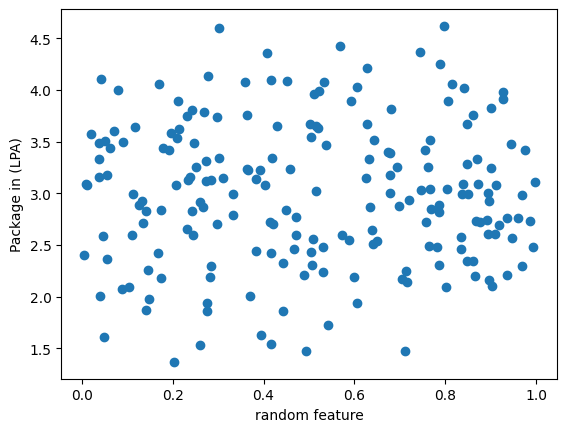

In [49]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random feature')
plt.ylabel('Package in (LPA)')

In [50]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [51]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
lr = LinearRegression()

In [54]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
y_pred = lr.predict(x_test)

In [56]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7789082220857089


In [57]:
1 - ((1-r2)*(40-1) / (40-1-2))

0.7669573151714228

In [58]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [59]:
new_df2.sample(5)

,cgpa,iq,package
171,8.01,4.56,3.76
84,4.26,2.63,1.53
199,6.22,3.43,2.33
184,7.88,3.34,3.14
108,7.76,3.84,3.54


Text(0, 0.5, 'Package in (LPA)')

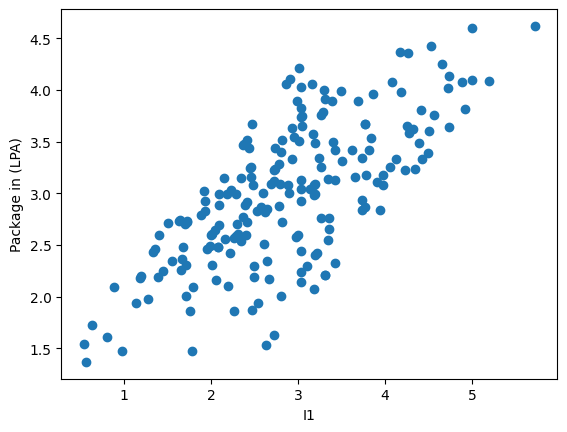

In [60]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('I1')
plt.ylabel('Package in (LPA)')

In [61]:
np.random.randint(-100,100)

-54

In [62]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [63]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
y_pred = lr.predict(x_test)

In [68]:
print("R2 score ",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score  0.7789082220857089


In [70]:
1 - ((1-r2) * (40-1)/(40-1-2))

0.7669573151714228